# Pytorch

[PyTorch](https://pytorch.org/)はPythonのオープンソースの機械学習・深層学習ライブラリです。

- 柔軟性を重視した設計であり、さらに、機械学習・深層学習モデルをPythonの慣用的なクラスや関数の取り扱い方で実装できるようになっています。
- GPUを使用した計算をサポートしますので、CPU上で同じ計算を行う場合に比べて、数十倍の高速化を実現します。

In [1]:
#pip install torch torchvision torchaudio
import torch

## テンソル

深層学習モデルは通常、入力から出力にどのようにマッピングされるのかを対応つけるデータ構造を表します。一般的に、このようなある形式のデータから別の形式への変換は膨大な浮動小数点数の計算を通じて実現されています。

データを浮動小数点数を扱うためには、Pytorchは基本的なデータ構造として「テンソル」を導入しています。

深層学習の文脈でのテンソルとは、ベクトルや行列を任意の次元数に一般化したものを指します。つまり、多次元配列を扱います。

```{margin}
Tensorとの同じように、NumPyも多次元配列を扱えます。ただ、PyTorchにおいてテンソルはGPU上でも使用できるため、処理速度の向上させることも可能です。
```

![](/Users/ryozawau/css_nlp/notebook/Figure/tensor.png)

### テンソルの操作

#### テンソルの作成

In [2]:
x = torch.ones(5, 3)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [3]:
x = torch.rand(5, 3)
print(x)

tensor([[0.0318, 0.1346, 0.1180],
        [0.9530, 0.6382, 0.1065],
        [0.2522, 0.5471, 0.6756],
        [0.6280, 0.0487, 0.7896],
        [0.7746, 0.3598, 0.7488]])


In [4]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


#### テンソル要素の型

テンソル要素の型は、引数に適切な```dtype```を渡すことで指定します。

In [5]:
double_points = torch.ones(10, 2, dtype=torch.double)
short_points = torch.tensor([[1, 2], [3, 4]], dtype=torch.short)

#### テンソルの操作（変形・変換等）

PyTorchにはテンソルに対する[操作（変形・演算など）](https://torch7.readthedocs.io/en/rtd/maths/index.html)が多く用意されています。


In [6]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)
print(x + y)

tensor([[1.5584, 1.7391, 1.6378],
        [1.8188, 1.1065, 1.5331],
        [1.2171, 0.5130, 0.5887],
        [1.1231, 1.2306, 0.3042],
        [0.7343, 0.4800, 1.2386]])


In [7]:
print(torch.add(x, y))

tensor([[1.5584, 1.7391, 1.6378],
        [1.8188, 1.1065, 1.5331],
        [1.2171, 0.5130, 0.5887],
        [1.1231, 1.2306, 0.3042],
        [0.7343, 0.4800, 1.2386]])


#### テンソルの一部指定や取り出し(Indexing)

Pytorchテンソルは、Numpyや他のPythonの科学計算ライブラリーと同じく、テンソルの次元ごとのレンジインデックス記法で一部指定や取り出しを行えます。

In [8]:
x[3:,:]

tensor([[0.1442, 0.9914, 0.0739],
        [0.2297, 0.3290, 0.5757]])

In [9]:
x[1:,0]

tensor([0.9724, 0.6709, 0.1442, 0.2297])

#### テンソルの微分機能

PyTorchテンソルは、テンソルに対して実行された計算を追跡し、計算結果の出力テンソルの微分を、各テンソルの要素に対して解析的に計算することができます。

In [10]:
# 微分を計算するためのテンソルを作成
x = torch.tensor(2.0, requires_grad=True)
# 関数の定義
y = x ** 2
# 勾配を計算
y.backward()

# 勾配の値を表示
print(x.grad)  # 4.0 (これは2*xの値、x=2のとき)

tensor(4.)


#### CUDA Tensors（CUDA テンソル）

tensorは ```.to``` メソッドを使用することであらゆるデバイス上のメモリへと移動させることができます。

In [11]:
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

## 学習データセットの作成

### ```Dataset```クラス



Pytorchで深層学習を実装する際には、特徴量行列とラベルを```Dataset```というクラスに渡して、特徴量行列とラベルを一つのデータベース的なものにまとめる働きをします。

一般的には、PyTorchの```torch.utils.data.Dataset```クラスを継承して定義します。以下に示すメソッドを定義するように指定されています。

- ```__init__(self)```: 初期実行関数です。Datasetを定義する際に必要な情報を受け取ります。
- ```__len__(self)```: データ全体の数を返す関数です。
- ```__getitem__(self, index)```: 指定されたindexに対応するデータと正解ラベル(ターゲット)を返します。



In [12]:
from torch.utils.data import Dataset


class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        # データセットのサイズを返す
        return len(self.data)

    def __getitem__(self, index):
        # 指定されたインデックスのデータとラベルを返す
        return self.data[index], self.labels[index]

In [13]:
# サンプルデータ
data = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
labels = torch.tensor([0, 1, 0])

# カスタムデータセットのインスタンスを作成
dataset = CustomDataset(data, labels)

In [14]:
dataset[0]

(tensor([1., 2.]), tensor(0))

```{margin}
データをPyTorchテンソルに変換する前に、なんらかの加工を加えたい場合もあります。特に画像データに足して、```transforms```は色々な前処理をサポートします。
```

### ```DataLoader```クラス

機械学習のトレーニングには、データセットのサンプリング、シャッフル、バッチ分割などの操作が必要されます。これらの操作を効率化にするために```DataLoader```クラスが用意されます。

- バッチ処理: 指定したバッチサイズでデータを分割します
- シャッフル: データの順序をランダムに並べ替えられます

In [15]:
# サンプルデータ
data = torch.randn(100, 3)  # 100個のデータ、3つの特徴
labels = torch.randint(0, 2, (100,))  # 100個のラベル (0または1)
dataset = CustomDataset(data, labels)

In [16]:
from torch.utils.data import DataLoader

dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

In [17]:
dataloader

In [18]:
for batch_data, batch_labels in dataloader:
    print("Batch data shape:", batch_data.shape)
    print("Batch labels shape:", batch_labels.shape)

Batch data shape: torch.Size([10, 3])
Batch labels shape: torch.Size([10])
Batch data shape: torch.Size([10, 3])
Batch labels shape: torch.Size([10])
Batch data shape: torch.Size([10, 3])
Batch labels shape: torch.Size([10])
Batch data shape: torch.Size([10, 3])
Batch labels shape: torch.Size([10])
Batch data shape: torch.Size([10, 3])
Batch labels shape: torch.Size([10])
Batch data shape: torch.Size([10, 3])
Batch labels shape: torch.Size([10])
Batch data shape: torch.Size([10, 3])
Batch labels shape: torch.Size([10])
Batch data shape: torch.Size([10, 3])
Batch labels shape: torch.Size([10])
Batch data shape: torch.Size([10, 3])
Batch labels shape: torch.Size([10])
Batch data shape: torch.Size([10, 3])
Batch labels shape: torch.Size([10])


In [19]:
# 最初のバッチを取得
data_iter = iter(dataloader)
sample_data, sample_label = next(data_iter)

# 1つ目のサンプルのデータとラベルを確認
print("Sample data:", sample_data[0])
print("Sample label:", sample_label[0])

Sample data: tensor([-0.2428, -0.6374,  0.0397])
Sample label: tensor(0)


```DataLoader```は反復処理が可能なので、トレーニング中のループで直接に使用することができます。

```{note}
`iter(dataloader)`は、`DataLoader`オブジェクトからイテレーターを作成します。 イテレーターは順次データを取り出すためのオブジェクトで、`for`ループや`next()`を使用して1つずつデータを取得できます。
```

## 深層学習モデルの構築

[`torch.nn`](https://pytorch.org/docs/stable/nn.html)で用意されているクラス、関数は、独自のニューラルネットワークを構築するために必要な要素を網羅しています。

PyTorchの全てのモジュールは、[`nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html)を継承しています。


そしてニューラルネットワークは、モジュール自体が他のモジュール（レイヤー）から構成されています。

この入れ子構造により、複雑なアーキテクチャを容易に構築・管理することができます。

### クラスの定義

``nn.Module``を継承し、独自のネットワークモデルを定義し、その後ネットワークのレイヤーを ``__init__``で初期化します。

``nn.Module`` を継承した全モジュールは、入力データの順伝搬関数である``forward``関数を持ちます。


In [20]:
from torch import nn

In [21]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__() # 親クラスnn.Moduleの初期化メソッドを呼び出し
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 3),
            nn.ReLU()
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

このクラスは、PyTorchの```nn.Module```を継承した単純なニューラルネットワークの実装を示しています。入力は固定長の$512$とされており、出力は$3$の次元を持つベクトルです。

```{margin}
最大長512であるテキストに対して、センチメント(ポジティブ、中立、ネガティブ)を予測するタスクをイメージしてください。
```

- ```self.linear_relu_stack```: このシーケンシャルな層は、3つの線形層とそれぞれの後に続くReLU活性化関数から構成されています。
    - [`nn.Sequential`](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html)にレイヤーを順に渡すだけで、数のレイヤーを順に積み重ねたモデルを簡単に定義できます。
    - [`linear layer`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)は、線形変換を施します。`linear layer`は重みとバイアスのパラメータを保持しています。
    - [`nn.ReLU`](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)という活性化関数を設置することで、ニューラルネットワークの表現力を向上させます。
- 順伝播メソッド (```forward```): 入力テンソル```x```を受け取り、ネットワークを通して出力を生成する機能を持ちます。

### GPUの利用

``NeuralNetwork``クラスのインスタンスを作成し、変数``device``上に移動させます。

以下でネットワークの構造を出力し確認します。

In [22]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cpu device


In [23]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=512, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=3, bias=True)
    (5): ReLU()
  )
)


### モデルによる計算

- ニューラルネットワークの最後のlinear layerは`logits`を出力します。この`logits`は[`nn.Softmax`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html)モジュールへと渡されます。出力ベクトルの要素の値は$[0, 1]$の範囲となり、これは各クラスである確率を示します。

In [24]:
X = torch.rand(3, 512, device=device)
logits = model(X) 
print(logits)

tensor([[0.0000, 0.0000, 0.1414],
        [0.0000, 0.0000, 0.1056],
        [0.0000, 0.0000, 0.1844]], grad_fn=<ReluBackward0>)


In [25]:
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([2, 2, 2])


```{admonition} おまけ：tensorboard
:class: tip, dropdown

tensorboardでニューラルネットワークの構造を確認する。

```python
from torch.utils.tensorboard import SummaryWriter
X = torch.rand(3, 28, 28)
writer = SummaryWriter("torchlogs/")
writer.add_graph(model, X)
writer.close()
```

```

## 自動微分

ニューラルネットワークを訓練する際、その学習アルゴリズムとして、**バックプロパゲーション（back propagation）** がよく使用されます。

バックプロパゲーションでは、モデルの重みなどの各パラメータは、損失関数に対するその変数の微分値（勾配）に応じて調整されます。

これらの勾配の値を計算するために、PyTorchには``torch.autograd`` という微分エンジンが組み込まれています。

autogradはPyTorchの計算グラフに対する勾配の自動計算を支援します。

シンプルな1レイヤーのネットワークを想定しましょう。

入力を``x``、パラメータを``w`` と ``b``、そして適切な損失関数を決めます。

<br>

PyTorchでは例えば以下のように実装します。

In [26]:
import torch

x = torch.rand(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

### 勾配情報の保存

こののニューラルネットワークでは、``w``と``b``が最適したいパラメータです。

そのため、これらの変数に対する損失関数の微分値を計算する必要があります。

これらのパラメータで微分を可能にするために、``requires_grad``属性をこれらのテンソルに追記します。

そうすると、勾配は、テンソルの ``grad_fn`` プロパティに格納されます。



In [27]:
print('Gradient function for z =',z.grad_fn)
print('Gradient function for loss =', loss.grad_fn)

Gradient function for z = <AddBackward0 object at 0x1600341c0>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x1600341c0>


### 勾配計算

ニューラルネットワークの各パラメータを最適化するために、入力``x``と出力``y``が与えられたもとで、損失関数の各変数の偏微分値、

すなわち

$\frac{\partial loss}{\partial w}$ 、$\frac{\partial loss}{\partial b}$ 

を求める必要があります。


これらの偏微分値を求めるために``loss.backward()``を実行し、``w.grad``と``b.grad``の値を導出します。

逆伝搬では、``.backward()``がテンソルに対して実行されると、autogradは、
- 各変数の ``.grad_fn``を計算する
- 各変数の``.grad``属性に微分値を代入する
- 微分の連鎖律を使用して、各leafのテンソルの微分値を求める

を行います。

In [28]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.1175, 0.1011, 0.0311],
        [0.1158, 0.0996, 0.0306],
        [0.0436, 0.0375, 0.0115],
        [0.1494, 0.1285, 0.0395],
        [0.0125, 0.0107, 0.0033]])
tensor([0.1548, 0.1331, 0.0409])


最適化ループを構築し、Pytorchより自動的に逆伝播

In [29]:
import torch.nn.functional as F

def training_loop(n_epochs, learning_rate, model, input, target):
    for epoch in range(1, n_epochs + 1):
        # Forward pass
        outputs = model(input)
        
        # Compute the loss using Binary Cross Entropy with Logits
        loss = F.binary_cross_entropy_with_logits(outputs, target)
        
        # Backward pass
        loss.backward()
        
        # Update the parameters
        with torch.no_grad():
            for param in model.parameters():
                param -= learning_rate * param.grad
        model.zero_grad()
        # Zero the parameter gradients after updating 
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item()}")

    return model

In [30]:
# Example usage (with dummy data)
input = torch.rand(10, 512)  # 10 samples with 512 features each
target = torch.rand(10, 3)  # 10 samples with 3 target values each

n_epochs = 500
learning_rate = 0.01
model = NeuralNetwork()

trained_model = training_loop(n_epochs, learning_rate, model, input, target)


Epoch 100, Loss: 0.6931470632553101
Epoch 200, Loss: 0.6931470632553101
Epoch 300, Loss: 0.6931470632553101
Epoch 400, Loss: 0.6931470632553101


Epoch 500, Loss: 0.6931470632553101


```{note}

PyTorchの勾配計算メカニズムでは、``.backward``を呼び出すと、リーフノードで導関数の計算結果が累積されます。つまり、もし``.backward``が以前にも呼び出されていた場合、損失関数が再び計算され、``.backward``も再び呼び出され、各リーフの勾配が前の反復で計算された結果の上に累積されます。その結果、勾配の値は誤ったものになります。

このようなことが起こらないようにするためには、反復のルーブのたびに``model.zero_grad()``を用いて明示的に勾配をゼロに設定する必要があります。


```

### 最適化関数

最適化は各訓練ステップにおいてモデルの誤差を小さくなるように、モデルパラメータを調整するプロセスです。

ここまでの説明は、単純な勾配下降法を最適化に使用しました。これは、シンプルなケースでは問題なく機能しますが、モデルが複雑になったときのために、パラメータ学習の収束を助ける最適化の工夫が必要されます。

#### Optimizer

```optim```というモジュールには、様々な最適化アルゴリズムが実装されています。

ここでは、確率的勾配降下法（Stochastic Gradient Descent）を例として使い方を説明します。

確率的勾配降下法は、ランダムに選んだ１つのデータのみで勾配を計算してパラメータを更新し、データの数だけ繰り返す方法です。

訓練したいモデルパラメータをoptimizerに登録し、合わせて学習率をハイパーパラメータとして渡すことで初期化を行います。訓練ループ内で、最適化（optimization）は3つのステップから構成されます。

- ``optimizer.zero_grad()``を実行し、モデルパラメータの勾配をリセットします。勾配の計算は蓄積されていくので、毎イテレーション、明示的にリセットします。


- 続いて、``loss.backwards()``を実行し、バックプロパゲーションを実行します。PyTorchは損失に対する各パラメータの偏微分の値（勾配）を求めます。

- 最後に、``optimizer.step()``を実行し、各パラメータの勾配を使用してパラメータの値を調整します。

In [31]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [32]:
def training_loop(n_epochs, learning_rate, model, input, target):
    # Use Binary Cross Entropy with Logits as the loss function
    
    # Use Adam as the optimizer
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    
    for epoch in range(1, n_epochs + 1):
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(input)
        loss = F.binary_cross_entropy_with_logits(outputs, target)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Print loss every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item()}")

    return model

In [33]:
input = torch.rand(10, 512)  # 10 samples with 512 features each
target = torch.rand(10, 3)  # 10 samples with 3 target values each

n_epochs = 1000
learning_rate = 0.001
model = NeuralNetwork()

trained_model = training_loop(n_epochs, learning_rate, model, input, target)

Epoch 100, Loss: 0.6923852562904358
Epoch 200, Loss: 0.69181889295578
Epoch 300, Loss: 0.6912978887557983
Epoch 400, Loss: 0.6907981038093567
Epoch 500, Loss: 0.6903423070907593
Epoch 600, Loss: 0.6899160742759705
Epoch 700, Loss: 0.6895319223403931
Epoch 800, Loss: 0.6891710162162781
Epoch 900, Loss: 0.6888293623924255
Epoch 1000, Loss: 0.6884948015213013


## 実装例(Irisデータ)

### データの読み込み

Irisデータセットは、アイリス花の3つの異なる種類（Setosa、Versicolour、Virginica）の各50サンプルからなるデータセットです。各サンプルには、以下の4つの特徴値（特徴量）があります。

- がく片の長さ (sepal length)：アイリス花のがく（緑色の部分）の長さをセンチメートルで測定したもの。
- がく片の幅 (sepal width)：がくの幅をセンチメートルで測定したもの。
- 花びらの長さ (petal length)：アイリス花の花びらの長さをセンチメートルで測定したもの。
- 花びらの幅 (petal width)：花びらの幅をセンチメートルで測定したもの。

これらの特徴値を使用して、アイリス花の3つの異なる種類を分類することが目標となっています。つまり、目標値（またはラベル）は以下の3つのクラスのいずれかです：

- Setosa
- Versicolour
- Virginica
このデータセットは、分類アルゴリズムを評価するための基準としてよく使用されます。

In [34]:
from tensorboardX import SummaryWriter
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset and create splits
iris_dataset = datasets.load_iris()

<Figure size 1000x800 with 0 Axes>

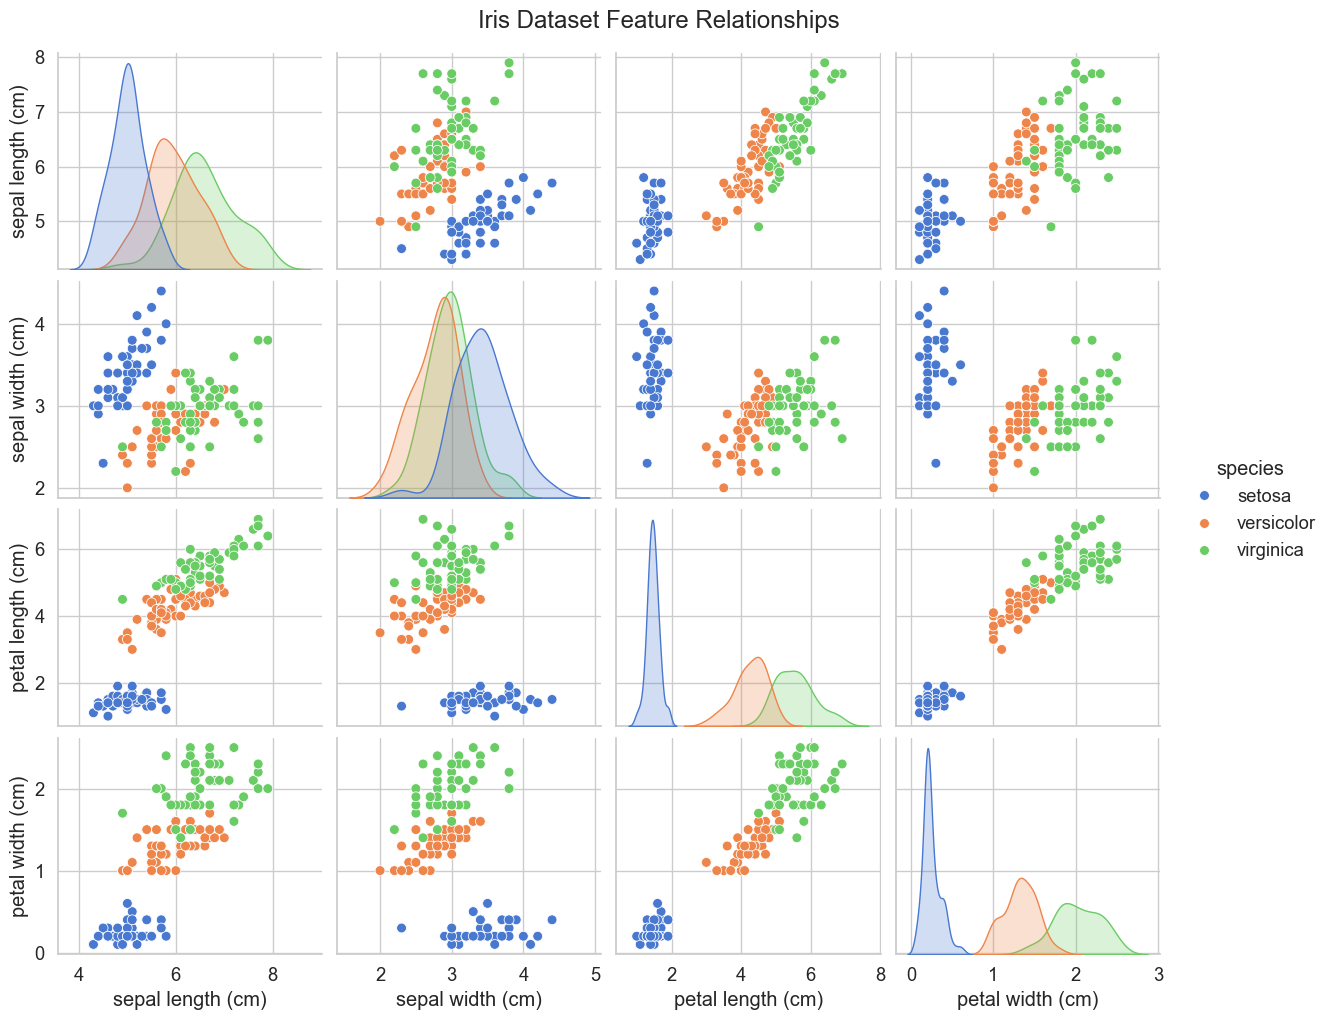

In [35]:
# Load the iris dataset
iris = datasets.load_iris()
data = iris.data
target = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Create a DataFrame for easier plotting
import pandas as pd
df = pd.DataFrame(data, columns=feature_names)
df['species'] = [target_names[t] for t in target]

# Set a publication-ready theme and increase font scale for better readability
sns.set_theme(style="whitegrid", font_scale=1.2)

# Pair plot to visualize relationships
plt.figure(figsize=(10, 8))
sns.pairplot(df, hue="species", palette="muted", height=2.5, aspect=1.2, plot_kws={'s': 50})
plt.suptitle('Iris Dataset Feature Relationships', y=1.02)

plt.show()

### 学習データの作成

- データセットを訓練データ、検証データ、テストデータに分割します。

In [36]:
x_tmp, xtest, y_tmp, ytest = train_test_split(iris_dataset.data, iris_dataset.target, test_size=0.2)
xtrain, xval, ytrain, yval = train_test_split(x_tmp, y_tmp, test_size=0.25)  # 0.25 x 0.8 = 0.2 -> 20% validation

- ```torch.from_numpy```関数で、NumPy配列をPyTorchのテンソルに変換します。
    - ニューラルネットワークに入力される特徴量やパラメータは浮動小数点数型である必要があるため、```.float()```メソッドは、テンソルのデータ型を浮動小数点数型に変換します。
    - 分類タスクのラベル（目的変数）は通常整数型で表されるため、```.long()```メソッドでテンソルのデータ型を長整数型に変換します。
- ```.to(device)```: データをGPUに移行します。

これにより、データをPyTorchでのモデル訓練や評価に使用する準備が整います。

In [37]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [38]:
xtrain = torch.from_numpy(xtrain).float().to(device)
ytrain = torch.from_numpy(ytrain).long().to(device)
xval = torch.from_numpy(xval).float().to(device)
yval = torch.from_numpy(yval).long().to(device)
xtest = torch.from_numpy(xtest).float().to(device)
ytest = torch.from_numpy(ytest).long().to(device)

### モデルの作成


ニューラルネットワークモデルを定義します。

- ```class NeuralNetwork(nn.Module)```という新しいクラスを定義しています。このクラスは```nn.Module```を継承しているので、モデル関連の機能（例：重みの管理、GPU対応、保存と読み込みの機能など）を利用できるようになります。
- ```def __init__(self, n_in, n_units, n_out)```: ネットワークをインスタンス化するときに呼び出され、初期値をモデルに渡します。
    - ```n_in```: 入力層のユニット（ニューロン）の数
    - ```n_units```: 隠れ層のユニットの数
    - ```n_out```: 出力層のユニットの数
    - ```super(NeuralNetwork, self).__init__()```: 親クラスである```nn.Module```のコンストラクタを呼び出すことで、モデル関連の機能を初期化しています。
    - ```self.l1 = nn.Linear(n_in, n_units)```: 入力層から隠れ層への線形変換（全結合層）を定義しています。
    - ```self.l2 = nn.Linear(n_units, n_out)```: 隠れ層から出力層への線形変換を定義しています。
- ```def forward(self, x)```:モデルが入力データを受け取ったときの順伝播を定義するメソッドです。
    - ```h = F.relu(self.l1(x))```: 入力$x$を```self.l1```レイヤー（全結合層）で変換した後、ReLU活性化関数を適用しています。
    - ```y = self.l2(h)```: $h$（隠れ層の出力）を```self.l2```レイヤーで変換して、ネットワークの最終出力yを生成しています。

In [39]:
class NeuralNetwork(nn.Module):
    def __init__(self, n_in, n_units, n_out):
        super(NeuralNetwork, self).__init__()
        self.l1 = nn.Linear(n_in, n_units)
        self.l2 = nn.Linear(n_units, n_out)

    def forward(self, x):
        h = F.relu(self.l1(x))
        y = self.l2(h)
        return y

### 学習の設定

学習に関連するハイパーパラメータを設定します。

- ```model = NeuralNetwork(n_in, n_units, n_out)```:指定された入力層、隠れ層、出力層のユニット数でモデルのインスタンスを作成しています。
- ```loss_function = nn.CrossEntropyLoss()```: 損失関数を定義します。
- ```optimizer = torch.optim.Adam(model.parameters(), lr=0.01)```: オプティマイザを指定します。
- ```model.to(device)```: モデルをGPUに移行します。データとモデルは必ず同じdeviceに置く必要があります。

In [40]:
n_in = xtrain.shape[1]  # number of input features (4 for Iris dataset)
n_units = 10  # number of units in the hidden layer
n_out = 3  # number of classes in the Iris dataset
model = NeuralNetwork(n_in, n_units, n_out)
model = model.to(device)  # Move the model to GPU
loss_function = nn.CrossEntropyLoss() # 分類問題のため交差エントロピー誤差を使用
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # optimizer
# Training loop
n_epochs = 100

### 学習ループの実装


ニューラルネットワークモデルの学習と検証のループを実装します。

- ```model.train()```と```model.eval()```:モデルが訓練モードか評価モードかを切り替えます。
- ```outputs = model(xtrain)```: 訓練データxtrainをモデルに渡し、出力を取得します。
- ```loss = loss_function(outputs, ytrain)```: モデルの出力と実際のラベルytrainとの間の損失を計算します。
- ```optimizer.zero_grad()```: 新しいエポックの勾配計算の前に、最適化器の勾配を初期化します。
- ```loss.backward()```: 損失に基づいて、モデルのすべてのパラメータの勾配を計算します。
- ```optimizer.step()```: 計算された勾配を使用して、モデルのパラメータを更新します。
- ```with torch.no_grad()```: 勾配の計算を無効化します。これは、評価フェーズでは勾配を計算する必要がないため、計算の効率を向上させるためです。
- ```val_outputs = model(xval)```: 検証データxvalをモデルに渡し、出力を取得します。
- ```_, val_predicted = torch.max(val_outputs, 1)```: モデルの出力から、最も高い確率を持つクラスのインデックスを取得します。
- ```val_accuracy = (val_predicted == yval).float().mean().item()```: 検証データに対する正解率を計算します。

```{margin}
```params```の値は関数```step```の呼び出し時に自動で更新されます。中身は、optimizerが```params.grad```の値を調べて、```params```の値に対して、学習率を掛け算した```grad```の値を引き算して更新しています。

```

In [41]:
for epoch in range(n_epochs):
    # Training phase
    model.train()
    outputs = model(xtrain)
    loss = loss_function(outputs, ytrain)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    # Validation phase
    model.eval()
    with torch.no_grad():
        val_outputs = model(xval)
        _, val_predicted = torch.max(val_outputs, 1)
        val_accuracy = (val_predicted == yval).float().mean().item()

    # Print losses and accuracies every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}, Val Accuracy: {val_accuracy*100:.2f}%')

Epoch [10/100], Loss: 0.9445, Val Accuracy: 46.67%
Epoch [20/100], Loss: 0.7519, Val Accuracy: 70.00%
Epoch [30/100], Loss: 0.5792, Val Accuracy: 80.00%
Epoch [40/100], Loss: 0.4529, Val Accuracy: 90.00%
Epoch [50/100], Loss: 0.3680, Val Accuracy: 96.67%
Epoch [60/100], Loss: 0.2998, Val Accuracy: 96.67%
Epoch [70/100], Loss: 0.2413, Val Accuracy: 100.00%
Epoch [80/100], Loss: 0.1947, Val Accuracy: 100.00%
Epoch [90/100], Loss: 0.1606, Val Accuracy: 100.00%
Epoch [100/100], Loss: 0.1367, Val Accuracy: 100.00%


### モデルの検証

テストデータでモデルの有効性を検証します。

In [42]:
model.eval()
with torch.no_grad():
    test_outputs = model(xtest)
    _, test_predicted = torch.max(test_outputs, 1)
    test_accuracy = (test_predicted == ytest).float().mean().item()
    print(f'Test Accuracy: {test_accuracy*100:.2f}%')

Test Accuracy: 100.00%


```{admonition} おまけ：SummaryWriterでtensorboardを使うためのデータを用意する
:class: tip, dropdown

```python
writer = SummaryWriter('runs/iris_experiment_1')
for epoch in range(n_epochs):
    # Training phase
    model.train()
    outputs = model(xtrain)
    loss = loss_function(outputs, ytrain)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    writer.add_scalar('Training Loss', loss.item(), epoch)
    
    # Validation phase
    model.eval()
    with torch.no_grad():
        val_outputs = model(xval)
        _, val_predicted = torch.max(val_outputs, 1)
        val_accuracy = (val_predicted == yval).float().mean().item()
        writer.add_scalar('Validation Accuracy', val_accuracy, epoch)

    # Print losses and accuracies every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}, Val Accuracy: {val_accuracy*100:.2f}%')
```


```

````{tab-set}
```{tab-item} 実習問題
``class NeuralNetwork(nn.Module)``を以下のように改装して、改めて学習を行なってください。

- 一つ隠れ層を追加し、``n_units_2``という引数でユニットの数を指定できるように設定しなさい。
- すべての隠れ層に``F.relu``で活性化関数を追加しなさい。
- 出力層に``F.log_softmax``で出力の正規化を行きなさい。

```
````

````{tab-set}
```{tab-item} 課題

sepal length, sepal width, petal lengthでpetal widthを予測するニューラルネットワークを構築、学習してください。

- 二つ以上の隠れ層を設定する。
- 学習の際、検証データで損失を計算し、20 epochごとに示す。
- 学習済みのモデルを用いて、テストデータに対する予測を行う。

```

````

```{admonition} ヒント
:class: tip, dropdown

```python
#入力データとターゲットデータの準備
X = data[:, :-1]  # sepal length, sepal width, petal length

y = data[:, -1]   # petal width

データの分割

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

#「ここからコードを追加」

#データをテンソルに変換

X_train = torch.tensor(X_train, dtype=torch.float32)

y_train = torch.tensor(y_train, dtype=torch.float32)

#「ここからコードを追加」

import torch.nn as nn

import torch.nn.functional as F

class RegressionNN(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2):
        super(RegressionNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        「ここからコードを追加」

#ハイパーパラメータ
learning_rate = 0.01

epochs = 1000

hidden_dim1 = 10

hidden_dim2 = 5

#モデルと最適化のインスタンス化
model = RegressionNN(input_dim=3, hidden_dim1=hidden_dim1, hidden_dim2=hidden_dim2)

criterion = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#学習ループ

for epoch in range(epochs):

#「ここからコードを追加」
```


```